# Experment No. 10 (Mini project)

## AIM
The aim of this project is to develop predictive models to classify individuals into different performance classes (A, B, C, D) based on various physical attributes and performance metrics.
## Objective
The objective of this project is to develop and evaluate multiple machine learning models to predict the performance class (A, B, C, D) of individuals based on their physical attributes and performance metrics. 
## About Dataset
The dataset provided contains information about individuals' physical attributes and performance metrics, along with their corresponding performance class. Here's a description of the dataset columns:

1. age: Age of the individual, ranging from 20 to 64 years.
2. gender: Gender of the individual, categorized as 'F' (female) or 'M' (male).
3. height_cm: Height of the individual in centimeters. (Can be converted to feet by dividing by 30.48)
4. weight_kg: Weight of the individual in kilograms.
5. body fat_%: Percentage of body fat of the individual.
6. diastolic: Diastolic blood pressure (minimum value).
7. systolic: Systolic blood pressure (minimum value).
8. gripForce: Grip force of the individual.
9. sit and bend forward_cm: Measurement of flexibility, typically indicating how far an individual can bend forward while sitting.
10. sit-ups counts: Number of sit-ups performed by the individual.
11. broad jump_cm: Distance jumped by the individual in a broad jump.
12. class: Performance class of the individual, categorized as 'A', 'B', 'C', or 'D'. 'A' represents the best performance class, while 'D' represents the lowest performance class. The dataset is stratified, meaning that each performance class is represented proportionally in the dataset.

### Impoting libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### Load data set

In [2]:
data = pd.read_csv("bodyPerformance.csv")

In [3]:
data.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

In [4]:
data.shape

(13393, 12)

In [5]:
data['gender'] = data['gender'].map({'M':0,'F':1})

In [6]:
data.head()

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0       0      172.3      75.24        21.3       80.0     130.0   
1  25.0       0      165.0      55.80        15.7       77.0     126.0   
2  31.0       0      179.6      78.00        20.1       92.0     152.0   
3  32.0       0      174.5      71.10        18.4       76.0     147.0   
4  28.0       0      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int64  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.2+ MB


### Checking for null Values

In [8]:
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [9]:
data.duplicated().sum()

1

### Checking for Duplicate values

In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data['class'].value_counts()

class
C    3349
D    3349
A    3347
B    3347
Name: count, dtype: int64

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


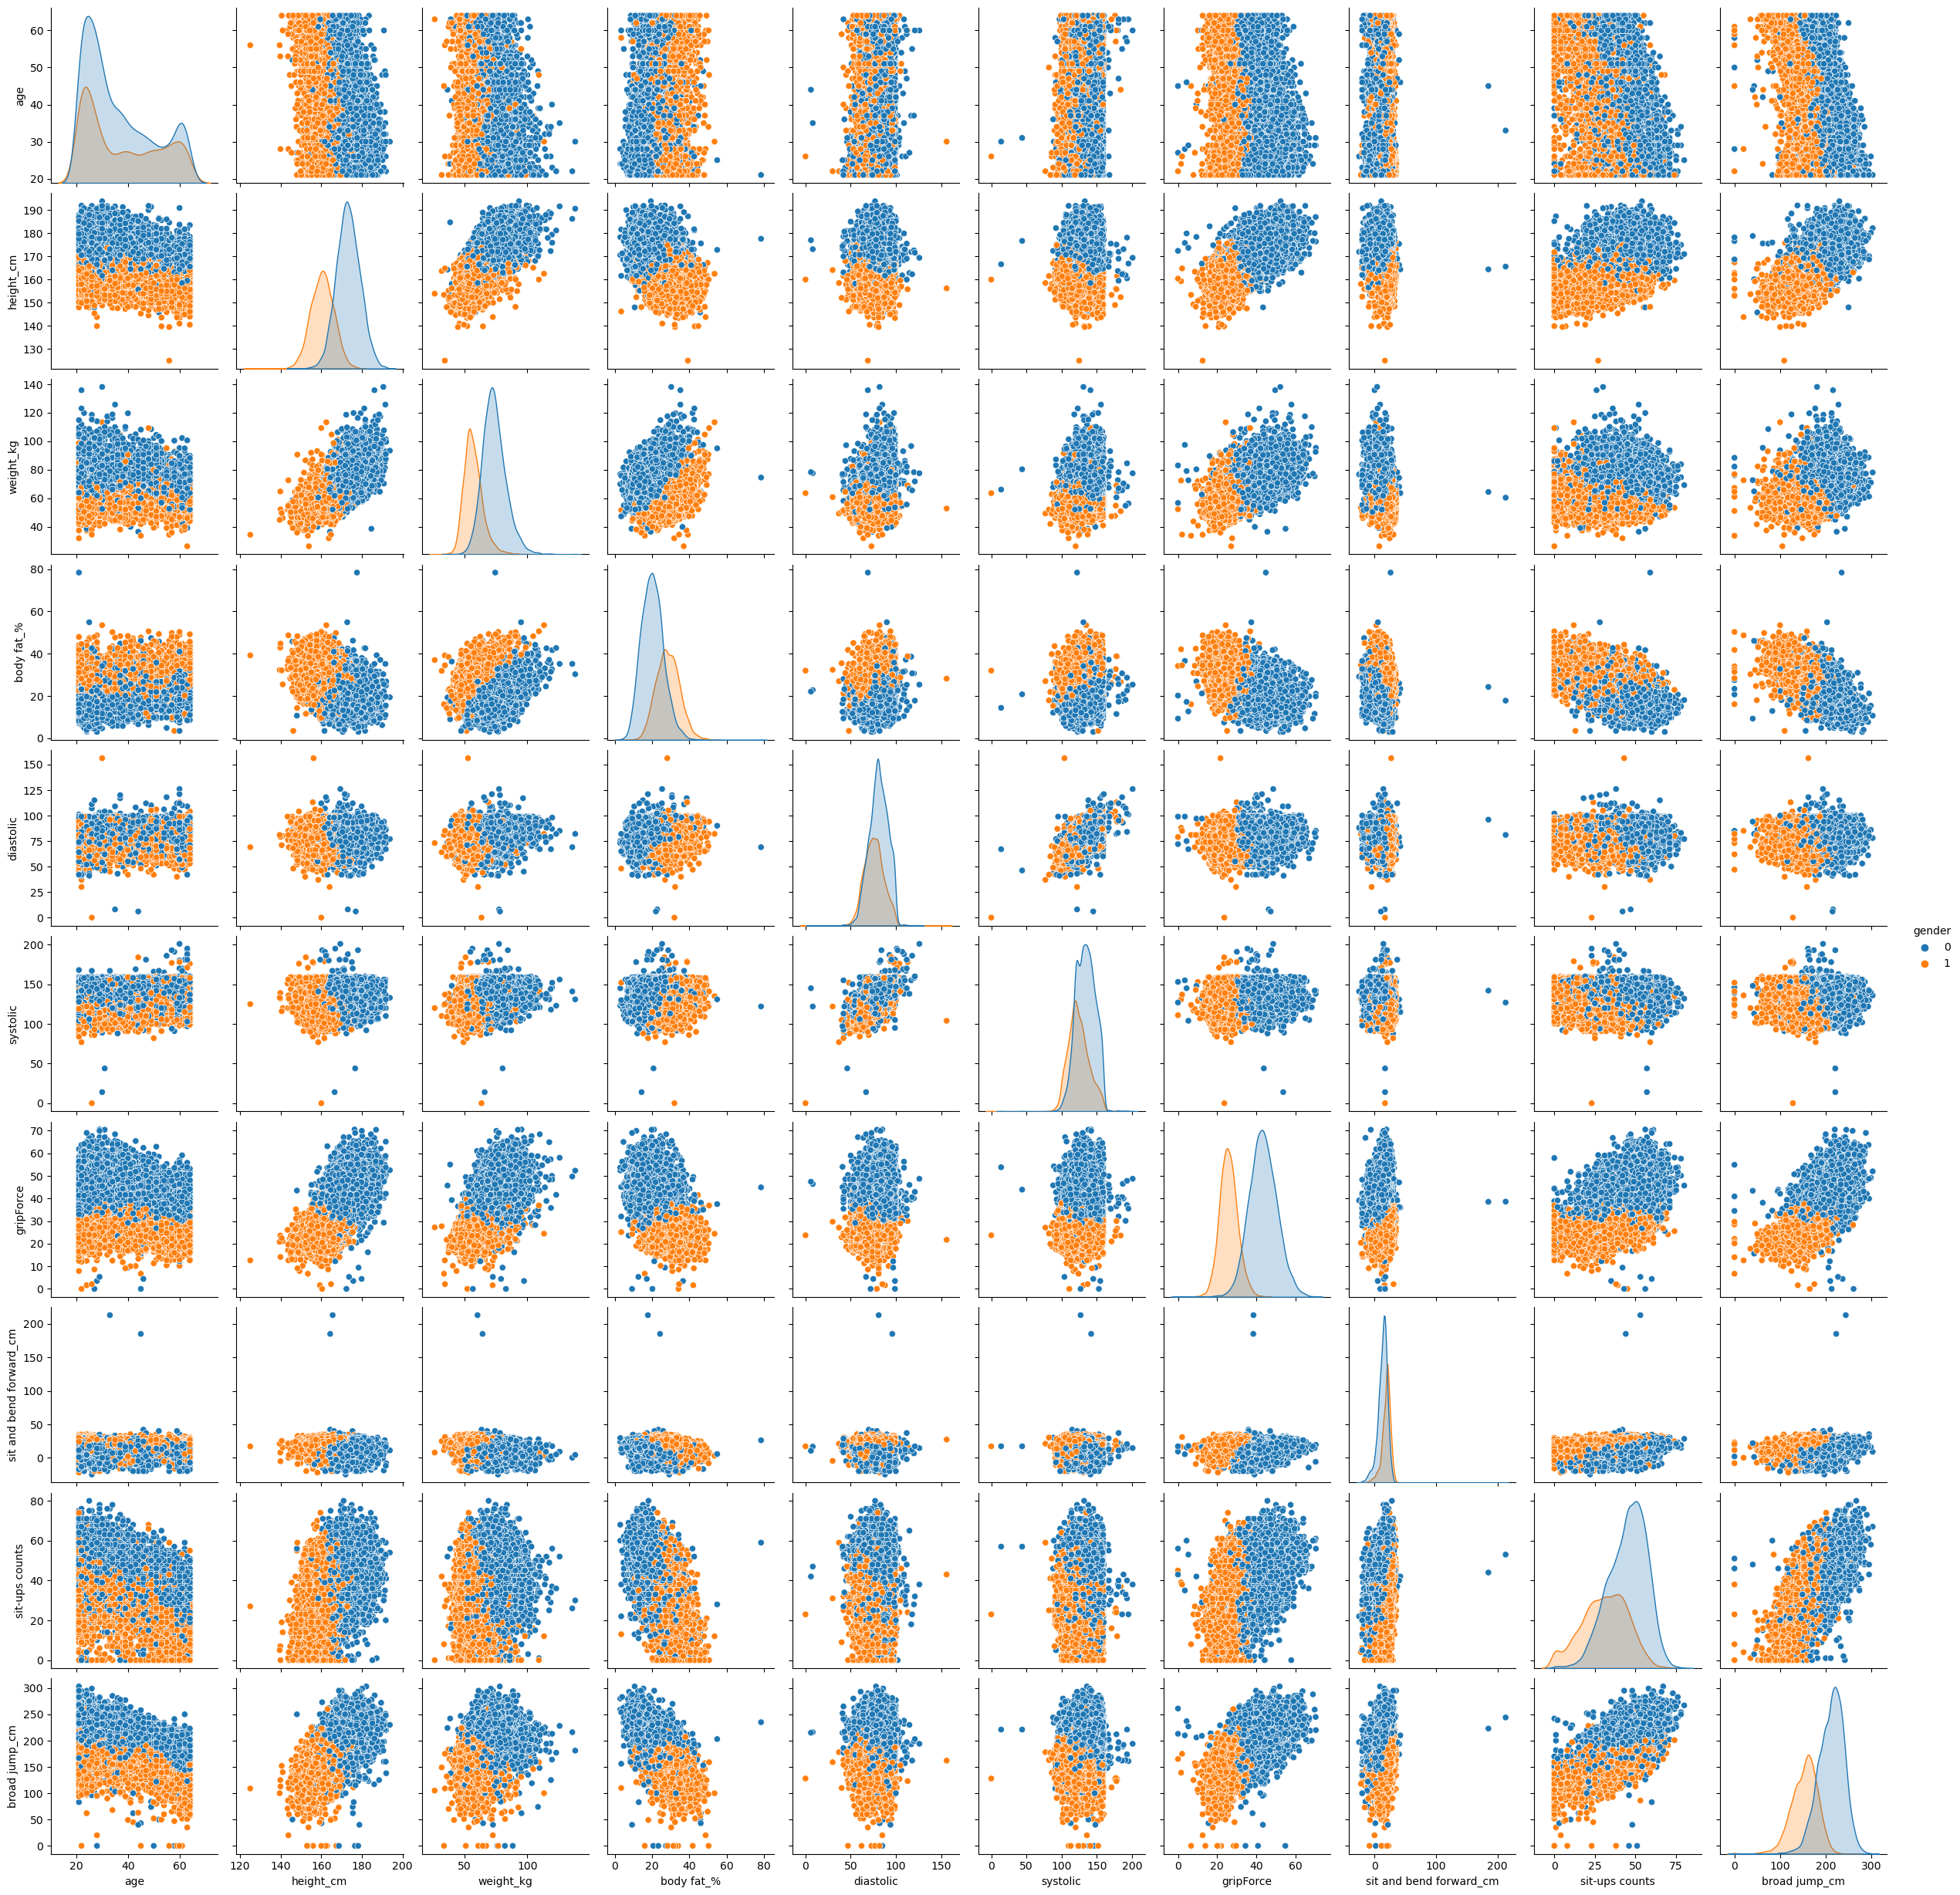

In [12]:
sns.pairplot(data, hue = 'gender')

In [13]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

### Checking for outliers

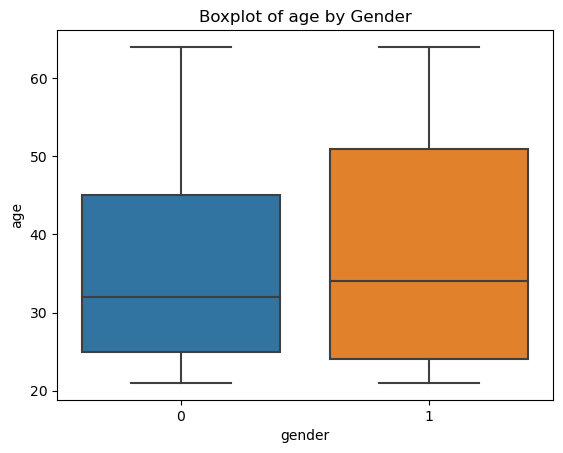

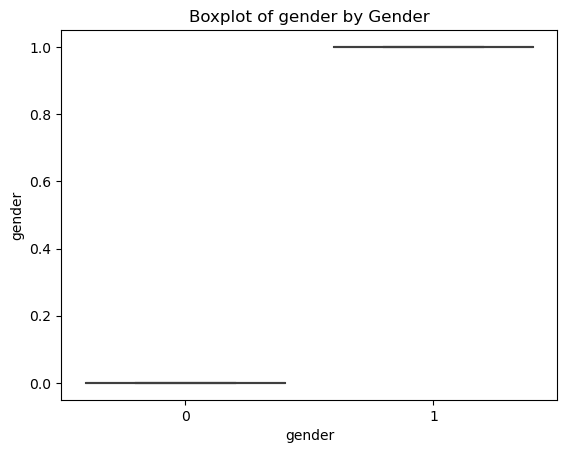

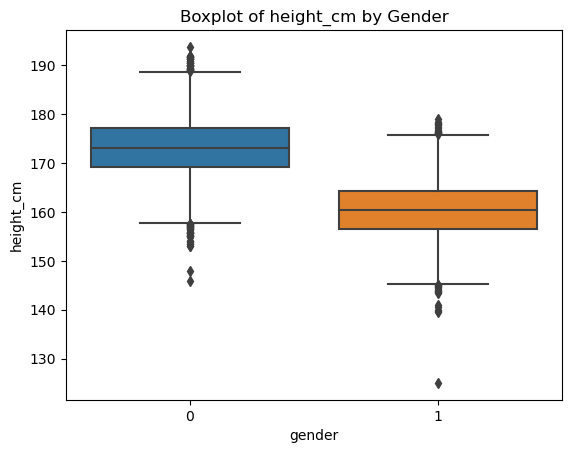

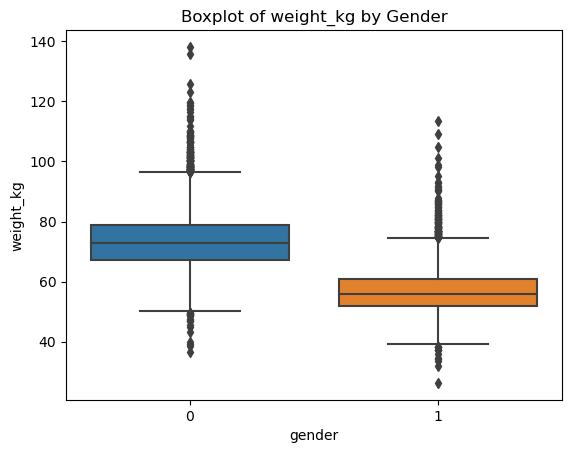

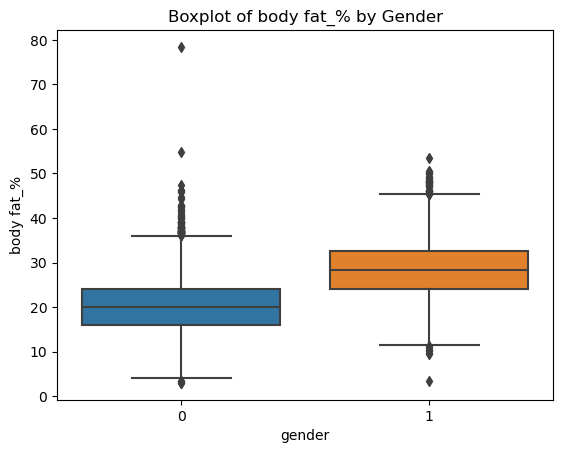

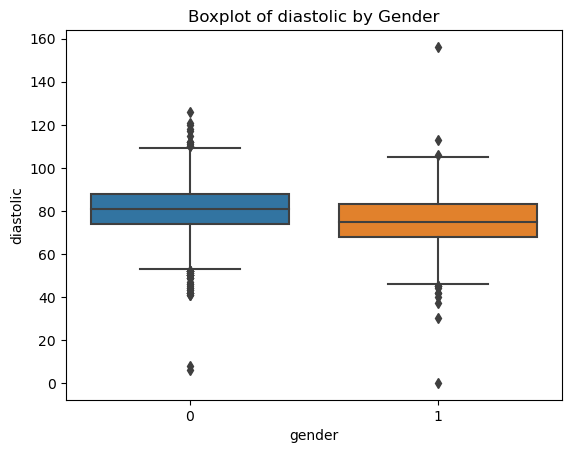

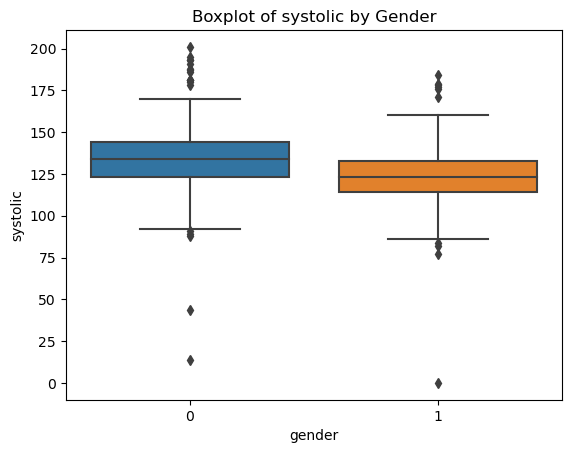

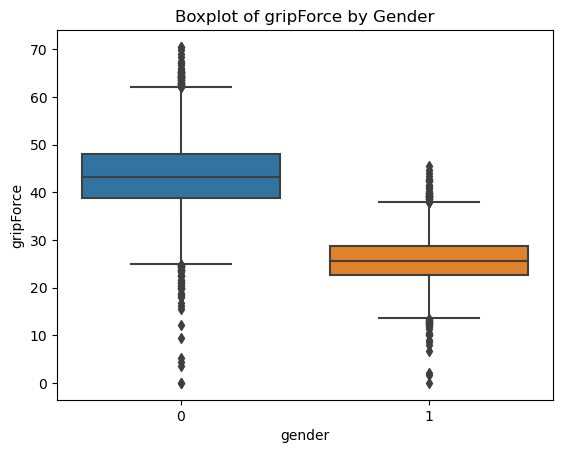

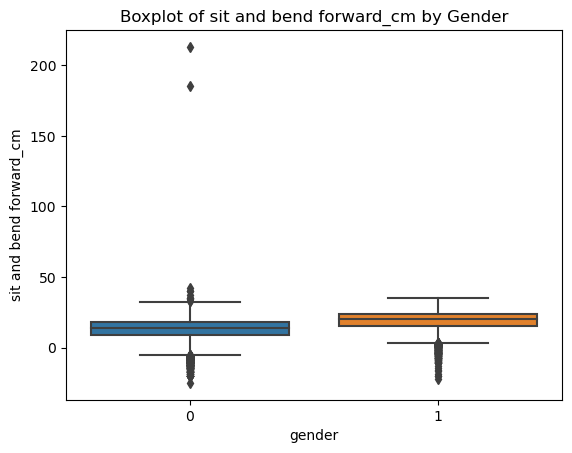

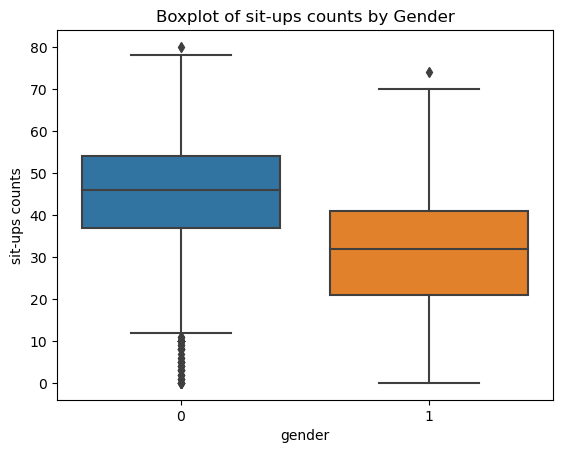

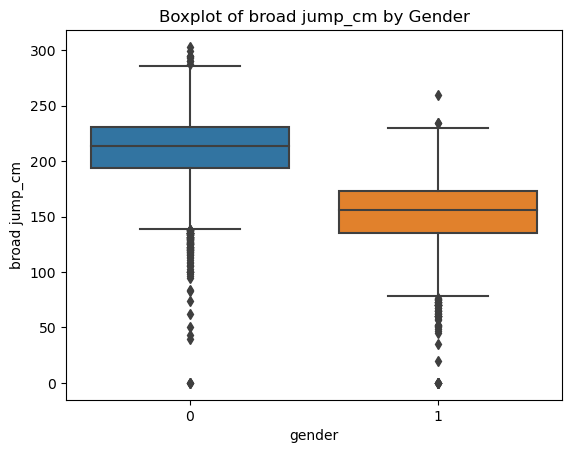

In [14]:
for column in numerical_columns:
    sns.boxplot(x='gender', y=column, data=data)
    plt.title(f'Boxplot of {column} by Gender')
    plt.show()

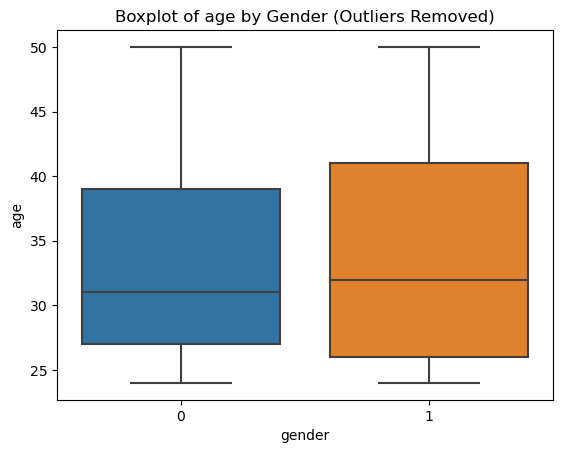

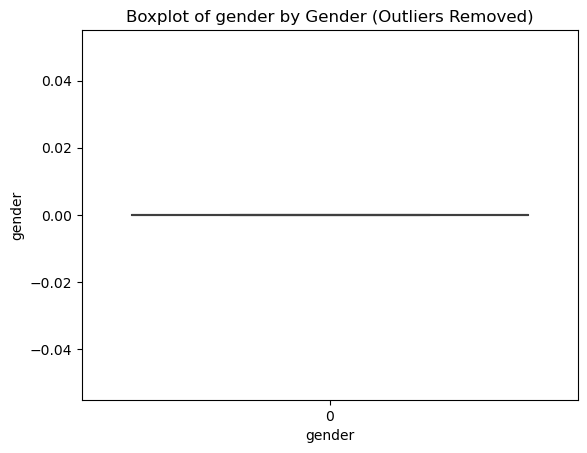

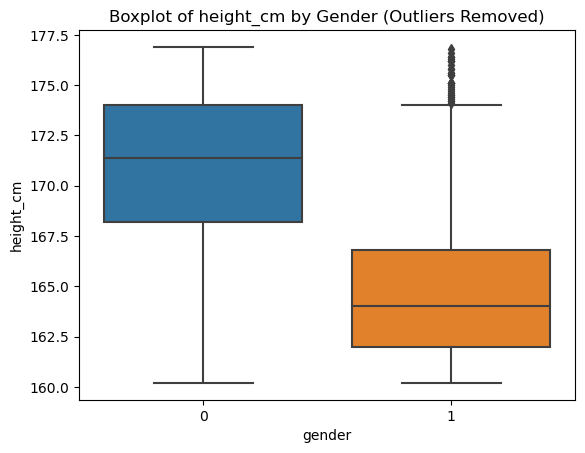

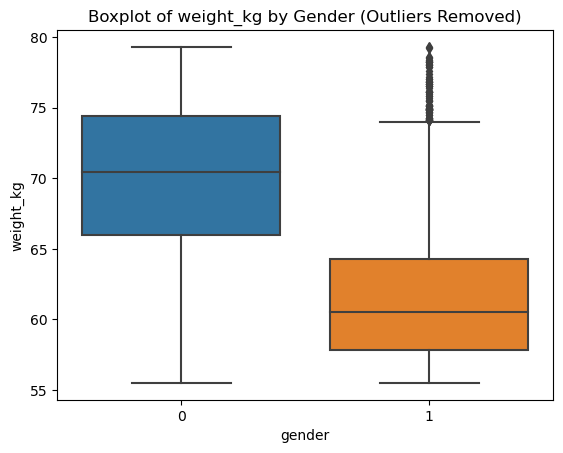

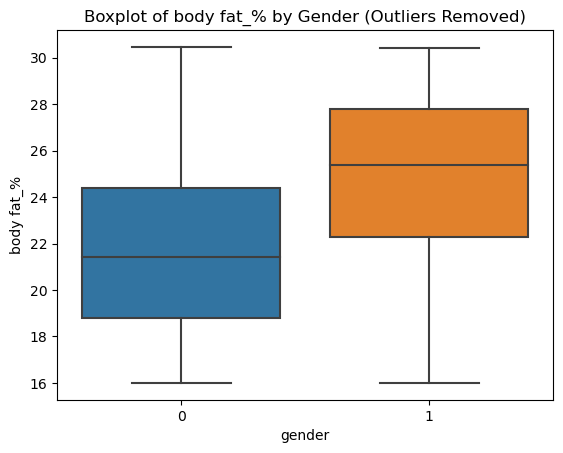

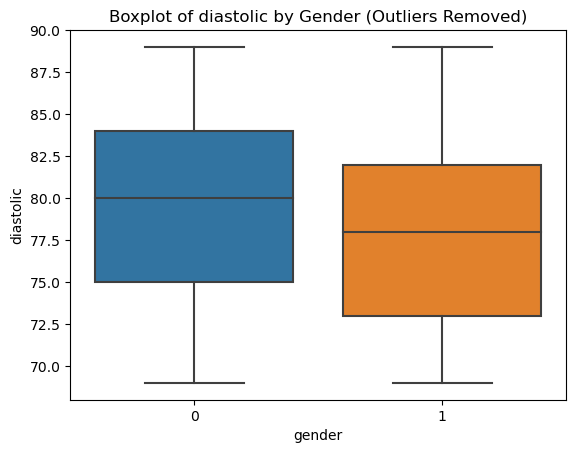

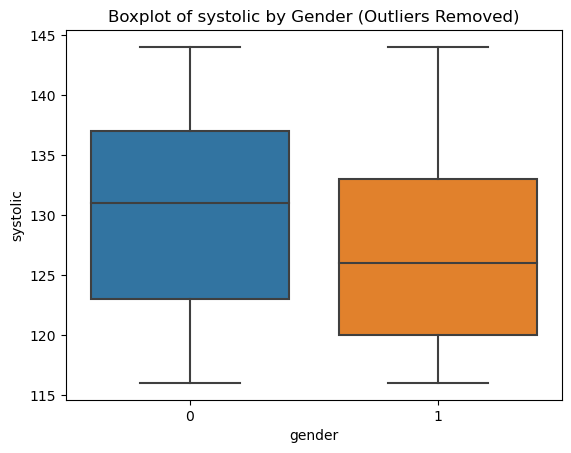

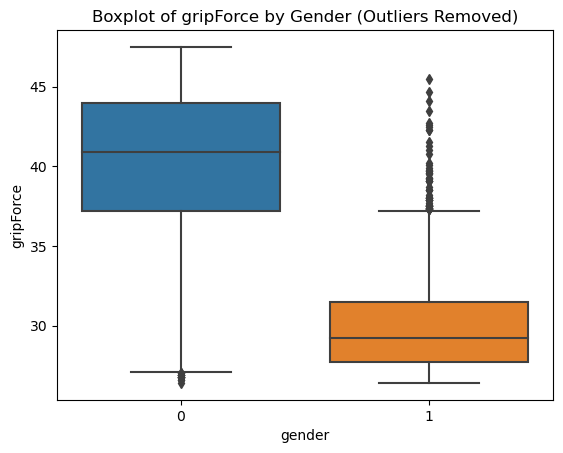

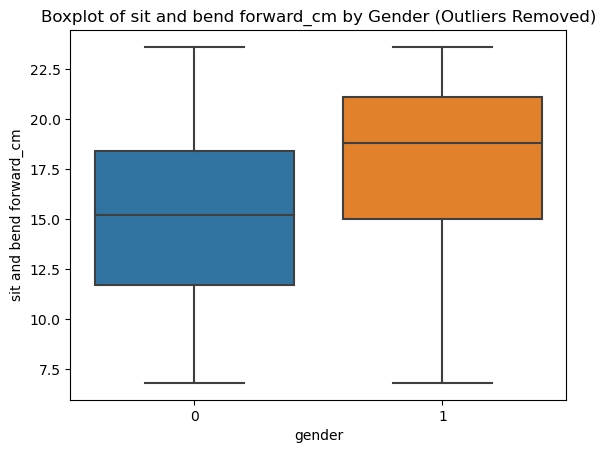

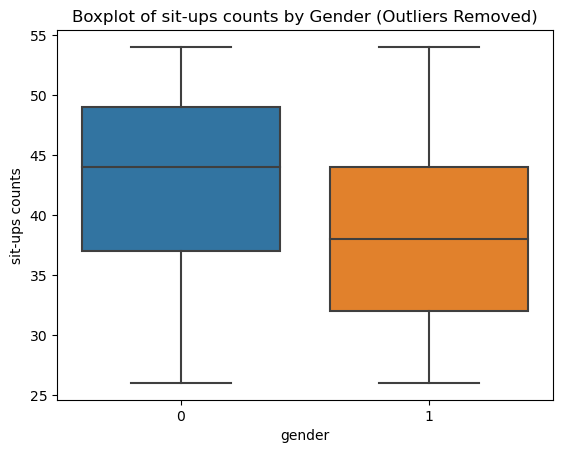

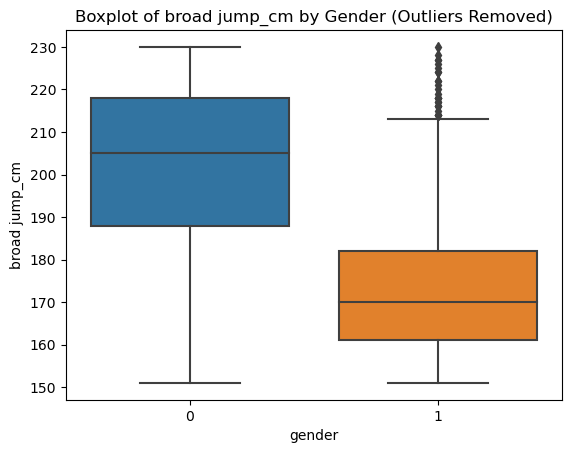

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

threshold = 1

# Function to remove outliers based on threshold
def remove_outliers(df, column, threshold):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from each numerical variable
for column in numerical_columns:
    data_no_outliers = remove_outliers(data, column, threshold)
    sns.boxplot(x='gender', y=column, data=data_no_outliers)
    plt.title(f'Boxplot of {column} by Gender (Outliers Removed)')
    plt.show()

In [16]:
data_no_outliers.shape

(8948, 12)

In [17]:
data = data_no_outliers

In [18]:
data

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0       0      172.3      75.24        21.3       80.0     130.0   
1      25.0       0      165.0      55.80        15.7       77.0     126.0   
2      31.0       0      179.6      78.00        20.1       92.0     152.0   
3      32.0       0      174.5      71.10        18.4       76.0     147.0   
4      28.0       0      173.8      67.70        17.1       70.0     127.0   
...     ...     ...        ...        ...         ...        ...       ...   
13387  39.0       0      174.4      70.80        24.3       78.0     132.0   
13388  25.0       0      172.1      71.80        16.2       74.0     141.0   
13389  21.0       0      179.7      63.90        12.1       74.0     128.0   
13390  39.0       0      177.2      80.50        20.1       78.0     132.0   
13392  34.0       0      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0           54.9                     18.4            60.0          217.0     C  
1           36.4                     16.3            53.0          229.0     A  
2           44.8                     12.0            49.0          181.0     C  
3           41.4                     15.2            53.0          219.0     B  
4           43.5                     27.1            45.0          217.0     B  
...          ...                      ...             ...            ...   ...  
13387       41.6                     12.0            44.0          168.0     B  
13388       35.8                     17.4            47.0          198.0     C  
13389       33.0                      1.1            48.0          167.0     D  
13390       63.5                     16.4            45.0          229.0     A  
13392       35.9                      7.1            51.0          180.0     C  

[8948 rows x 12 columns]

In [19]:
data['class'].value_counts()

class
B    2338
C    2243
A    2196
D    2171
Name: count, dtype: int64

In [20]:
x = data.drop(columns='class', axis=1)

In [21]:
y = data['class']

In [22]:
x

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0       0      172.3      75.24        21.3       80.0     130.0   
1      25.0       0      165.0      55.80        15.7       77.0     126.0   
2      31.0       0      179.6      78.00        20.1       92.0     152.0   
3      32.0       0      174.5      71.10        18.4       76.0     147.0   
4      28.0       0      173.8      67.70        17.1       70.0     127.0   
...     ...     ...        ...        ...         ...        ...       ...   
13387  39.0       0      174.4      70.80        24.3       78.0     132.0   
13388  25.0       0      172.1      71.80        16.2       74.0     141.0   
13389  21.0       0      179.7      63.90        12.1       74.0     128.0   
13390  39.0       0      177.2      80.50        20.1       78.0     132.0   
13392  34.0       0      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
0           54.9                     18.4            60.0          217.0  
1           36.4                     16.3            53.0          229.0  
2           44.8                     12.0            49.0          181.0  
3           41.4                     15.2            53.0          219.0  
4           43.5                     27.1            45.0          217.0  
...          ...                      ...             ...            ...  
13387       41.6                     12.0            44.0          168.0  
13388       35.8                     17.4            47.0          198.0  
13389       33.0                      1.1            48.0          167.0  
13390       63.5                     16.4            45.0          229.0  
13392       35.9                      7.1            51.0          180.0  

[8948 rows x 11 columns]

In [23]:
y

0        C
1        A
2        C
3        B
4        B
        ..
13387    B
13388    C
13389    D
13390    A
13392    C
Name: class, Length: 8948, dtype: object

### Splitting the data set into training and testing dataset

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
x_train.head()

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
8189   30.0       0      180.0      81.70        15.1       80.0     120.0   
11773  30.0       0      170.0      74.74        23.4       78.0     147.0   
1248   25.0       0      167.6      59.60        19.0       57.0     115.0   
11251  62.0       0      169.4      65.90        15.0       77.0     143.0   
3127   54.0       0      170.5      72.30        24.5       87.0     156.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
8189        42.6                     14.7            56.0          221.0  
11773       47.0                     15.0            55.0          204.0  
1248        50.2                     17.7            38.0          218.0  
11251       39.3                     16.7            43.0          195.0  
3127        36.4                     13.8            41.0          180.0

In [26]:
y_train.head()

8189     A
11773    A
1248     C
11251    A
3127     B
Name: class, dtype: object

In [27]:
x_test.head()

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
12113  47.0       0      177.3       80.3        24.3       79.0     128.0   
901    28.0       1      171.5       64.0        18.5       85.0     135.0   
9519   39.0       1      155.5       50.4        25.5       79.0     131.0   
9254   24.0       0      171.9       96.2        34.5       96.0     152.0   
8348   38.0       0      164.0       70.7        25.4       90.0     141.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
12113       40.3                     14.8            33.0          161.0  
901         31.4                     18.5            36.0          198.0  
9519        30.4                     21.5            31.0          160.0  
9254        43.8                      5.7            30.0          185.0  
8348        48.0                     -3.9            50.0          198.0

In [28]:
y_test.head()

12113    C
901      A
9519     A
9254     D
8348     D
Name: class, dtype: object

# Model 1 : Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model1 = LogisticRegression(max_iter=1000)

In [31]:
model1.fit(x_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [32]:
y_pred = model1.predict(x_test)

In [33]:
cm = confusion_matrix(y_pred,y_test)

In [34]:
cm

array([[301, 113,  40,   3],
       [125, 213, 107,  29],
       [ 11, 120, 236,  70],
       [  2,  22,  66, 332]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix by Logistic regression')

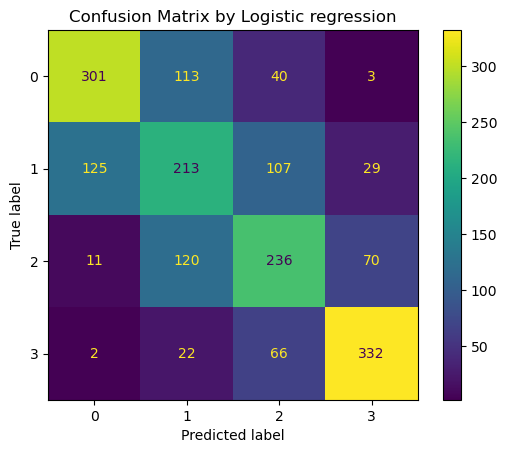

In [35]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix by Logistic regression')

In [36]:
acc_log = accuracy_score(y_pred,y_test)
acc_log

0.6044692737430167

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           A       0.69      0.66      0.67       457
           B       0.46      0.45      0.45       474
           C       0.53      0.54      0.53       437
           D       0.76      0.79      0.78       422

    accuracy                           0.60      1790
   macro avg       0.61      0.61      0.61      1790
weighted avg       0.60      0.60      0.60      1790



# Model 2 : Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
model2 = GaussianNB()

In [40]:
model2.fit(x_train,y_train)

GaussianNB()

In [41]:
y_pred = model2.predict(x_test)

In [42]:
cm = confusion_matrix(y_pred,y_test)

In [43]:
cm

array([[251, 156,  91,  17],
       [107,  88,  72,  44],
       [ 74, 188, 229,  86],
       [  7,  36,  57, 287]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix by Naive Bayes')

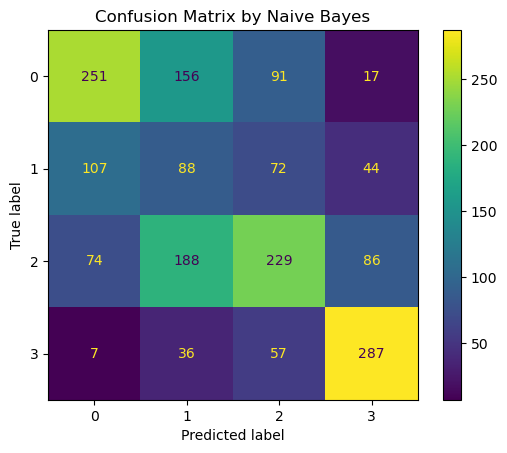

In [44]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix by Naive Bayes')

In [45]:
acc_nv = accuracy_score(y_pred,y_test)
acc_nv

0.4776536312849162

In [46]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           A       0.57      0.49      0.53       515
           B       0.19      0.28      0.23       311
           C       0.51      0.40      0.45       577
           D       0.66      0.74      0.70       387

    accuracy                           0.48      1790
   macro avg       0.48      0.48      0.47      1790
weighted avg       0.50      0.48      0.49      1790



# Model 3 : support vector machine

In [47]:
from sklearn.svm import SVC

In [48]:
model3 = SVC()

In [49]:
model3.fit(x_train,y_train)

SVC()

In [50]:
y_pred = model3.predict(x_test)

In [51]:
cm = confusion_matrix(y_pred,y_test)

In [52]:
cm

array([[296, 110,  45,   9],
       [138, 243, 132,  38],
       [  4,  98, 230,  88],
       [  1,  17,  42, 299]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix by SVC')

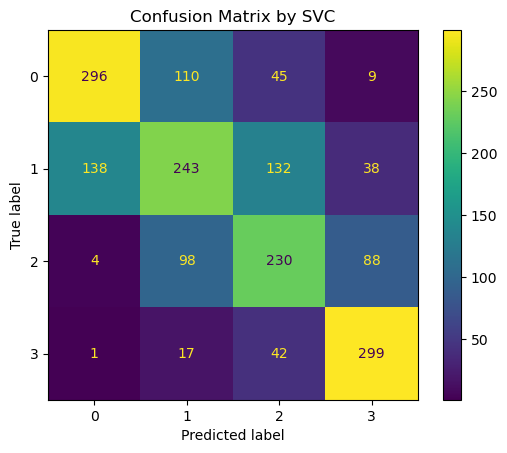

In [53]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix by SVC')

In [54]:
acc_svm = accuracy_score(y_pred,y_test)
acc_svm

0.5966480446927375

In [55]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           A       0.67      0.64      0.66       460
           B       0.52      0.44      0.48       551
           C       0.51      0.55      0.53       420
           D       0.69      0.83      0.75       359

    accuracy                           0.60      1790
   macro avg       0.60      0.62      0.60      1790
weighted avg       0.59      0.60      0.59      1790



# Model 4 : KNN classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
model4 = KNeighborsClassifier()

In [58]:
model4.fit(x_train,y_train)

KNeighborsClassifier()

In [59]:
y_pred = model4.predict(x_test)

In [60]:
cm = confusion_matrix(y_pred,y_test)

In [61]:
cm

array([[336, 180,  63,  15],
       [ 87, 215, 173,  52],
       [ 16,  60, 195, 119],
       [  0,  13,  18, 248]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix by KNN')

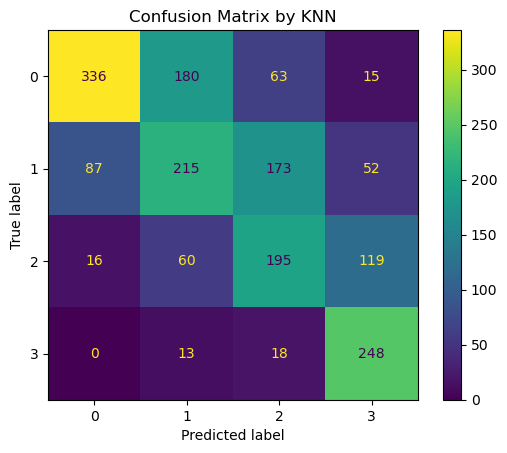

In [62]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix by KNN')

In [63]:
acc_knn =accuracy_score(y_pred,y_test)
acc_knn

0.5553072625698324

In [64]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           A       0.77      0.57      0.65       594
           B       0.46      0.41      0.43       527
           C       0.43      0.50      0.46       390
           D       0.57      0.89      0.70       279

    accuracy                           0.56      1790
   macro avg       0.56      0.59      0.56      1790
weighted avg       0.57      0.56      0.55      1790



# Model 5 : Decision Trees 

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
model5 = DecisionTreeClassifier()

In [67]:
model5.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
y_pred = model5.predict(x_test)

In [69]:
cm = confusion_matrix(y_pred,y_test)

In [70]:
cm

array([[294, 105,  42,   8],
       [ 93, 221,  88,  31],
       [ 42,  91, 266,  54],
       [ 10,  51,  53, 341]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix by Decision Trees')

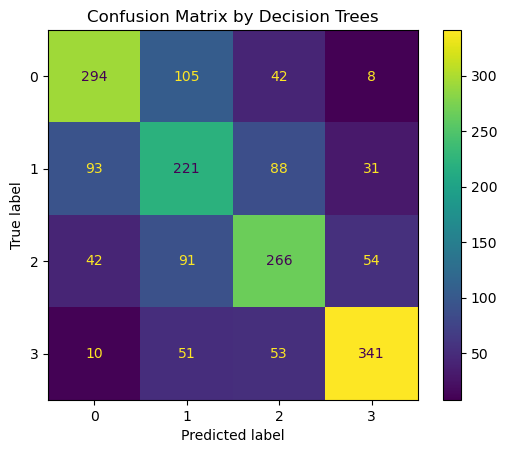

In [71]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix by Decision Trees')

In [72]:
acc_dt = accuracy_score(y_pred,y_test)
acc_dt

0.6268156424581005

In [73]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           A       0.67      0.65      0.66       449
           B       0.47      0.51      0.49       433
           C       0.59      0.59      0.59       453
           D       0.79      0.75      0.77       455

    accuracy                           0.63      1790
   macro avg       0.63      0.63      0.63      1790
weighted avg       0.63      0.63      0.63      1790



# Model 6 : Random Forest classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
model6 = RandomForestClassifier(n_estimators=100, random_state=42)

In [76]:
model6.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred = model6.predict(x_test)

In [78]:
cm = confusion_matrix(y_pred,y_test)

In [79]:
cm

array([[358,  98,  36,   4],
       [ 71, 287,  87,  27],
       [  7,  53, 304,  53],
       [  3,  30,  22, 350]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix by Random Forest')

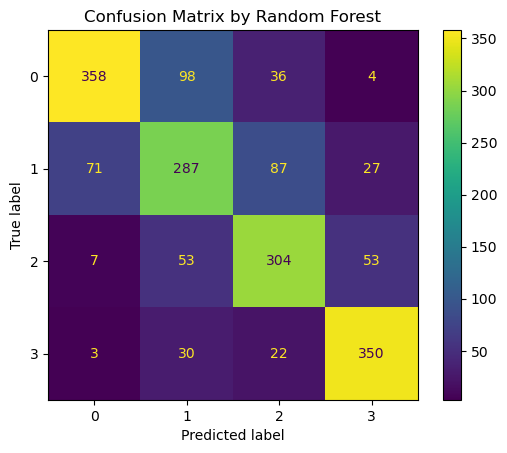

In [80]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix by Random Forest')

In [81]:
acc_rmf = accuracy_score(y_pred,y_test)
acc_rmf

0.7256983240223464

In [82]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           A       0.82      0.72      0.77       496
           B       0.61      0.61      0.61       472
           C       0.68      0.73      0.70       417
           D       0.81      0.86      0.83       405

    accuracy                           0.73      1790
   macro avg       0.73      0.73      0.73      1790
weighted avg       0.73      0.73      0.73      1790



### Model Evaluation

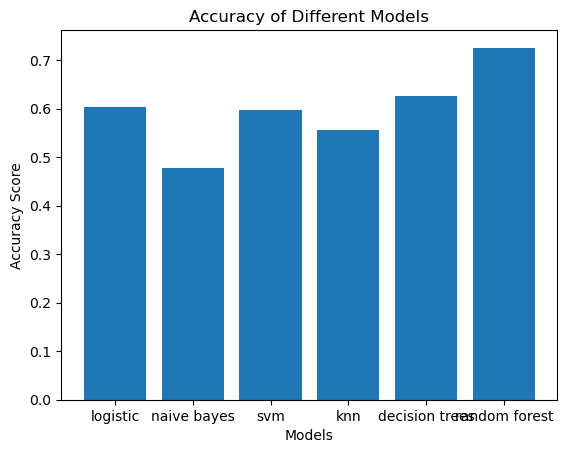

In [83]:
accuracy_score = [acc_log, acc_nv, acc_svm, acc_knn, acc_dt, acc_rmf]
models = ['logistic', 'naive bayes', 'svm', 'knn', 'decision trees', 'random forest']

plt.bar(models, accuracy_score)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Different Models')
plt.show()


Random forest perform well for this data set among these models.So, we choose random forest. 

### Testing the model

In [84]:
input_data = x.iloc[[20]]

In [85]:
y.iloc[20]

'B'

In [86]:
input_data

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
34  49.0       1      151.5       52.0        27.6       77.0     144.0   

    gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
34       23.8                     21.3            39.0          154.0

In [87]:
prediction = model6.predict(input_data)
prediction

array(['B'], dtype=object)

## Learning Outcomes:
#### 1.Data Preprocessing: 
Gain proficiency in handling real-world datasets, including handling missing values, removing duplicates, and handling categorical variables.
#### 2.Exploratory Data Analysis (EDA): 
Utilize statistical and visualization techniques to understand the distribution of data, identify outliers, and explore relationships between variables.
#### 3.Feature Engineering: 
Understand the significance of feature selection and extraction in building effective predictive models.
Model Building and Evaluation:
#### 4. Logistic Regression: 
Understand the basics of logistic regression for classification tasks.
1. Naive Bayes Classifier: Learn about the probabilistic approach of Naive Bayes and its application in classification.
2. Support Vector Machine (SVM): Understand the concept of SVM for both linear and non-linear classification.
3. K-Nearest Neighbors (KNN): Learn the principle of KNN and its application in classification tasks.
4. Decision Trees: Understand the intuitive appeal of decision trees and how they can be used for classification.
5. Random Forest: Explore ensemble learning techniques, particularly the Random Forest algorithm, for classification.
#### 5. Model Evaluation:
Understand and interpret evaluation metrics such as accuracy, precision, recall, and F1-score.
Learn to analyze confusion matrices to assess model performance and identify areas for improvement.
#### 6.Model Comparison:
Compare the performance of different classification algorithms in terms of accuracy and other evaluation metrics.
Gain insights into the strengths and weaknesses of each model and their suitability for the given task.
#### 7.Deployment and Interpretation:
Gain an understanding of deploying machine learning models in real-world scenarios.
Interpret the results of the models to make informed decisions, such as identifying individuals at risk or in need of improvement based on their physical performance attributes.